In [69]:
from torch.utils.data import Dataset
import config
import os
import matplotlib.pyplot as plt
from PIL import Image


class A(Dataset):
    def __init__(self, root_dir):
        super().__init__()
        self.root = root_dir
        self.img_files = []
        for root, dirs, files in os.walk(self.root):
            for file in files:
                self.img_files.append(os.path.join(root, file))
                
    def __getitem__(self, index):
        img_path = self.img_files[index]
        img = Image.open(img_path)
        w, h = img.size
        x = img.crop((0, 0, w//2, h))
        y = img.crop((w//2, 0, w, h))
        return x, y
    
    def __len__(self):
        return len(self.img_files)
    
z = A(root_dir=config.ROOT_DIR)

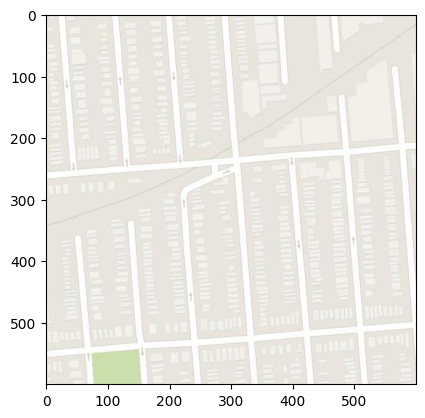

In [70]:
img = z.__getitem__(367)
plt.imshow(img[1])